## My Objective

My goal is to solve the prediction task defined by the competition using the provided synthetic training and test data. Most likely, the target variable is whether a client subscribes to a term deposit (y = yes/no).

## What I Need to Clarify

  * I need to confirm the exact target variable — probably subscription outcome.

  * I should check the competition rules to understand the evaluation metric (AUC, accuracy, log loss, etc.).

## Understanding the Dataset

I’ve been given:

  * A synthetic training set (features + labels).

  * A synthetic test set (features only, no labels).

* Optionally, I can refer to the original Bank Marketing dataset for additional context or data augmentation.

## What I Plan to Do

  * Train models on the synthetic training dataset.

  * Use cross-validation to evaluate performance and avoid overfitting — especially important due to the distribution shift between training and test data.

* Optionally, I’ll try augmenting the training data with the original dataset to see if that helps with generalization.

## Key Challenge

There's a distribution shift between training and test data. The organizers made the synthetic test data close — but not identical — to the training distribution. I need to build a model that can handle this kind of shift and still generalize well.

## My Next Steps

1. Exploratory Data Analysis (EDA)

  * Understand the data distributions and compare them with the original dataset if needed.

2. Feature Engineering

  * Encode categorical variables.

  * Scale numeric features if necessary.

3. Modeling

  * Start with baseline models like Logistic Regression, XGBoost, LightGBM, and simple Neural Networks.

  * Use cross-validation for model selection and hyperparameter tuning.

4. Submission

  * Make predictions on the test set.

  * Submit the final predictions as per competition requirements.

## Critical Columns (Usually important for most analyses):

* `age` - Demographic information, often crucial for segmentation

* `balance` - Financial information, very important for financial analysis

* `duration` - Call duration (if this is call center data), often strongly correlated with outcomes

* `y` - This appears to be your target variable (likely binary outcome)

## Potentially Important Columns (Depends on context):

* `job` - Occupation/employment type

* `education` - Education level

* `housing` - Housing loan status

* `loan` - Personal loan status

* `marital` - Marital status

* `campaign` - Number of contacts during this campaign

* `pdays` - Days since last contact

* `previous` - Number of contacts before this campaign

* `poutcome` - Outcome of previous marketing campaign

## Columns to Consider Dropping (Depending on analysis):

* `default` - Often has very imbalanced data (mostly "no")

* `contact` - Contact communication type

* `day` - Day of month

* `month` - Last contact month

In [2]:
import sys
print(sys.executable)

d:\CODE\JUpyter\.venv\Scripts\python.exe


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train = df_train.drop("id", axis =1 )
df_test = df_test.drop("id", axis =1)


In [5]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


## Data Visualizations

### 1. Correlation Heatmap (for Numerical Features)

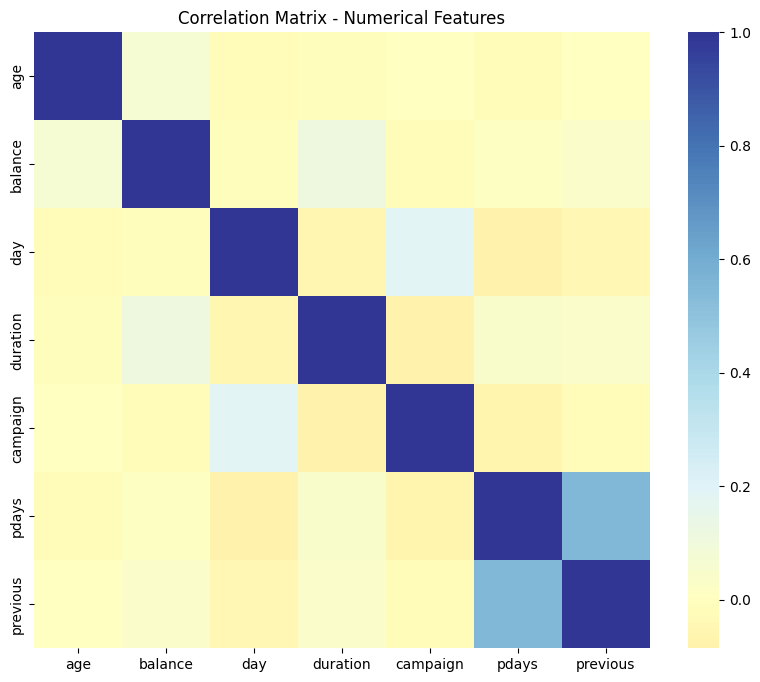

In [13]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']

corr_matrix = df_test[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='RdYlBu', center=0, square=True)
plt.title("Correlation Matrix - Numerical Features")
plt.show()

### 2. Pairplot with Target Variables

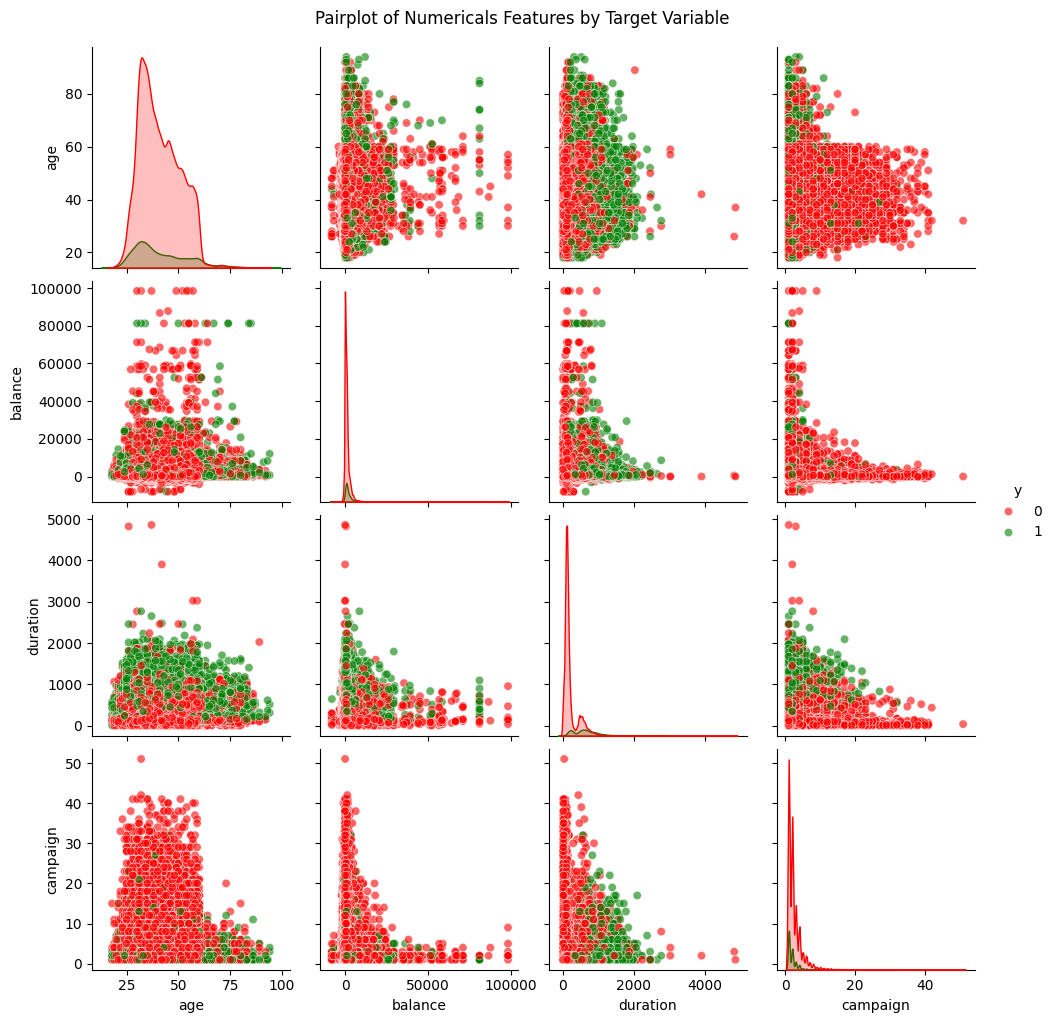

In [ ]:
# Using 20% sample
sample_df = df_train.sample(frac=0.2, random_state=42)

sns.pairplot(sample_df,
             vars=['age','balance','duration', 'campaign'],
             hue='y',
             palette={0:'red', 1:'green'},
             plot_kws = {'alpha':0.6})

plt.suptitle("Pairplot of Numericals Features by Target Variable", y=1.02)
plt.show()

### 3. Categorical vs Target Variable 

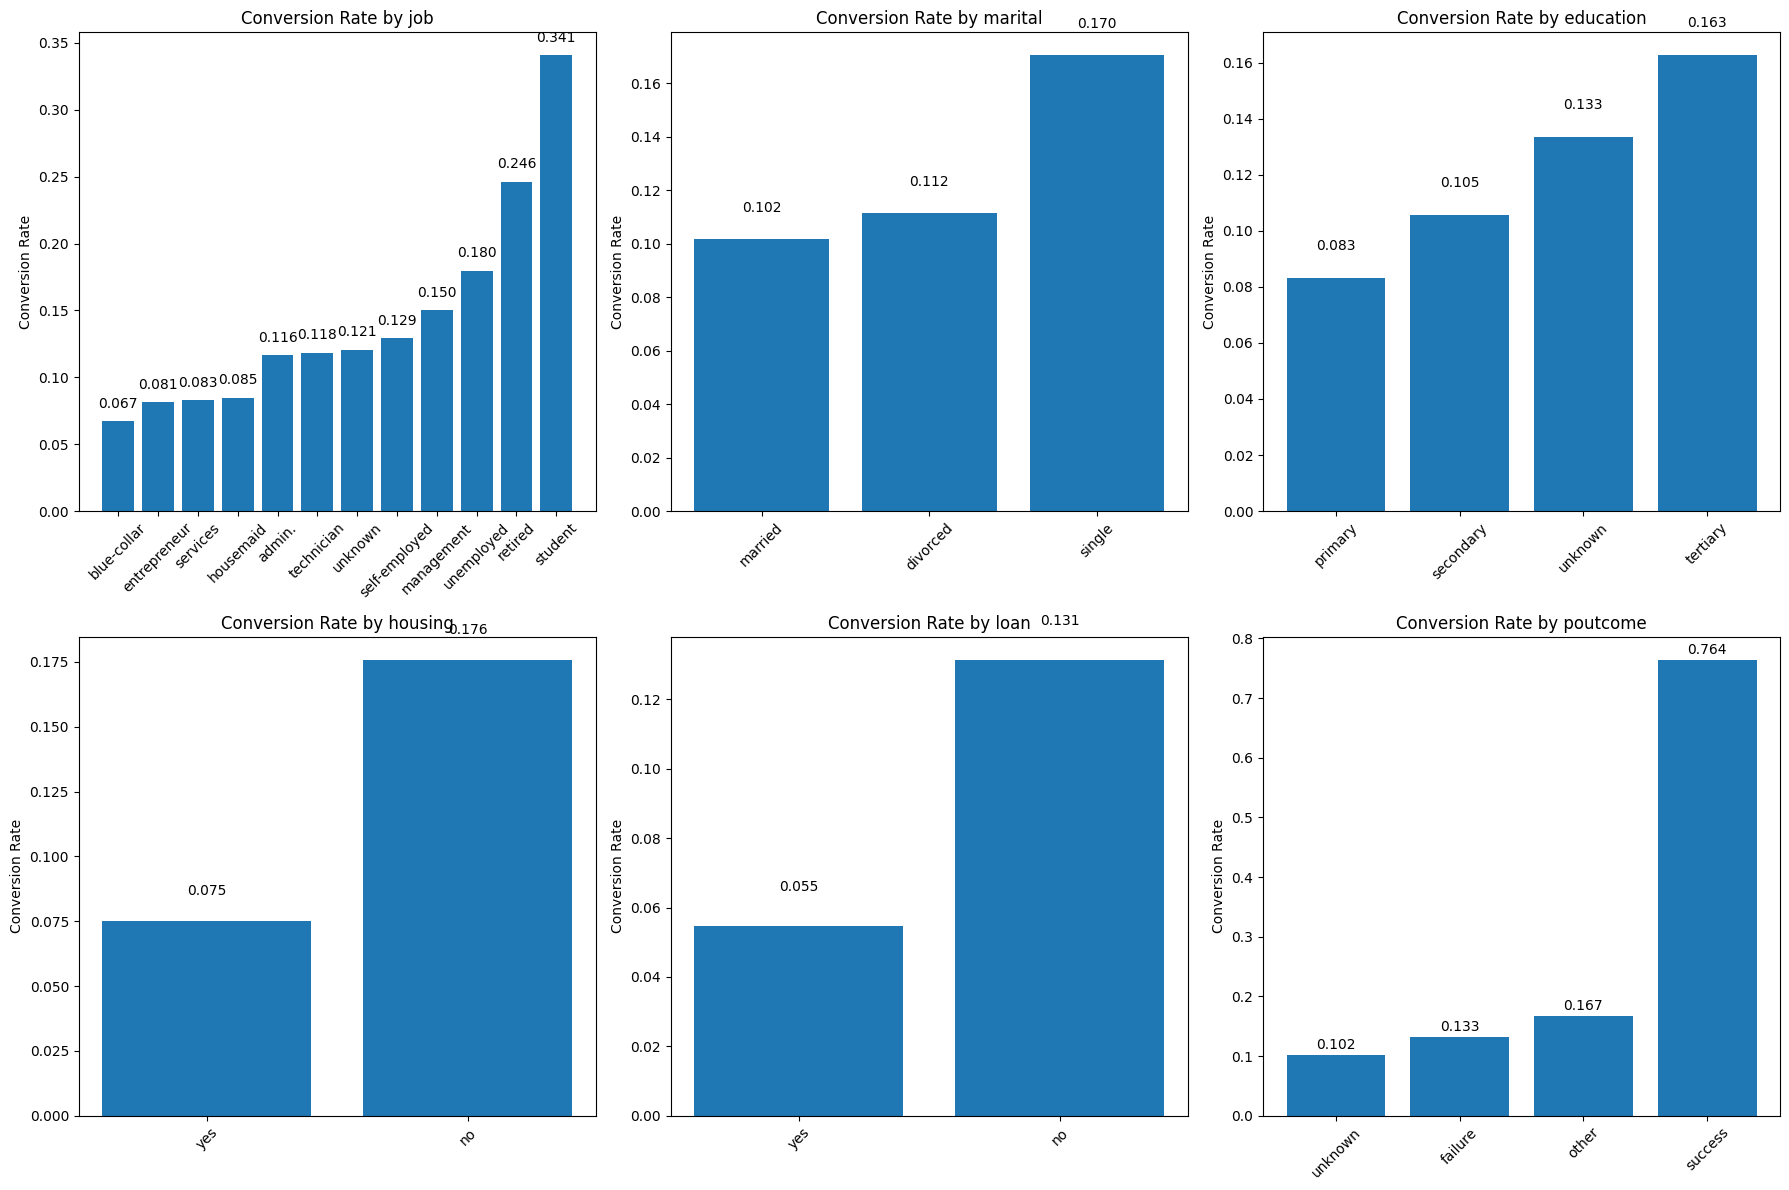

In [ ]:
# Plot categorical features against target
categorical_features = ['job', 'marital', 'education', 'housing','loan','poutcome']

fig, axes = plt.subplots(2,3, figsize = (18,12))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
  conversion_rates = df_train.groupby(col)['y'].mean().sort_values()
  axes[i].bar(conversion_rates.index.astype(str), conversion_rates.values)

  axes[i].set_title(f'Conversion Rate by {col}')
  axes[i].set_ylabel('Conversion Rate')
  axes[i].tick_params(axis='x', rotation = 45)

  for j, v in enumerate(conversion_rates.values):
    axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show() 

### 4. Distribution Plots by Target

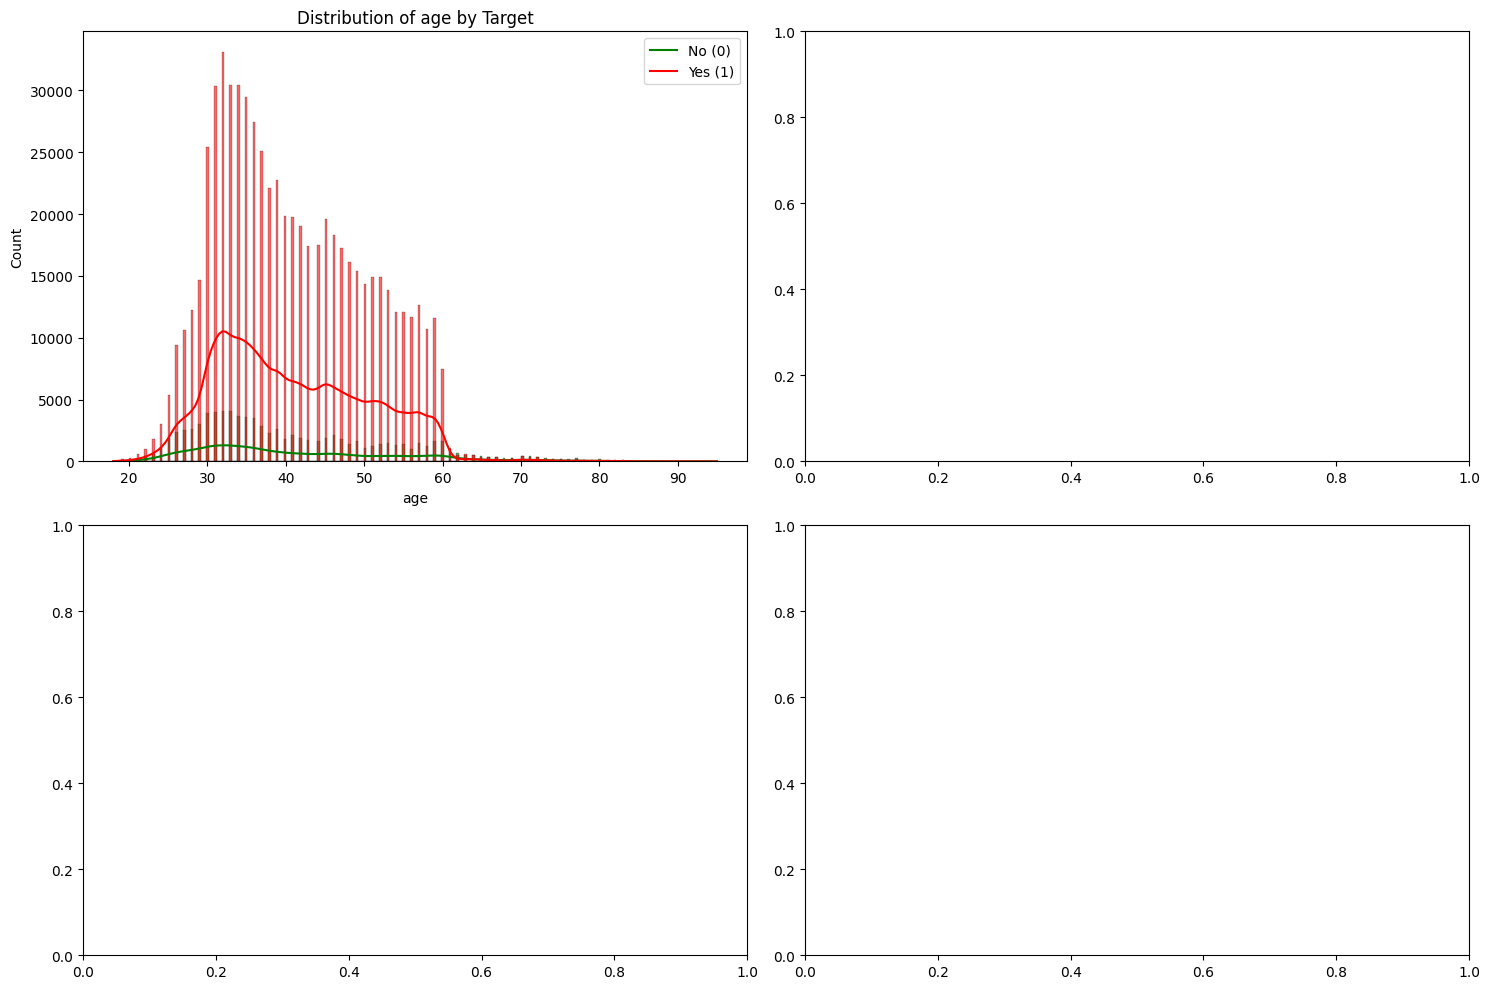

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
# Distribution of numericals features by target 

numerical_features = ['age','balance', 'duration', 'campaign']

fig, axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
  sns.histplot(data=df_train, x = col, hue='y', kde=True, 
               palette={0:'red',1:'green'},
               alpha = 0.6, 
               ax = axes[i]
               )
  axes[i].set_title(f'Distribution of {col} by Target')
  axes[i].legend(['No (0)', 'Yes (1)'])
  plt.tight_layout()
  plt.show()